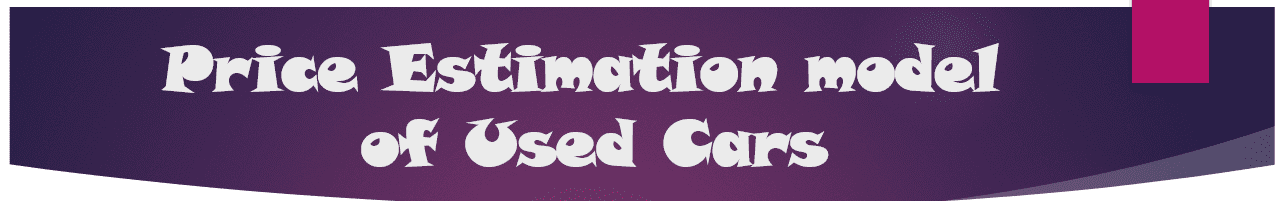

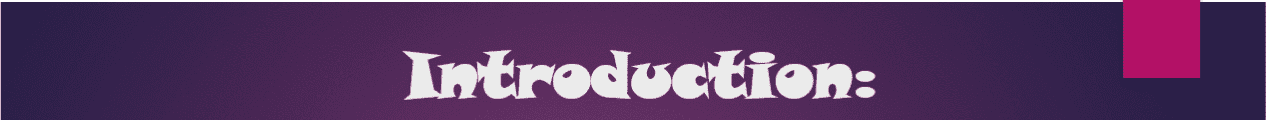

**Study says, the used car market was 1.2 trillion USD in 2020 and is projected to reach over 1.5 trillion USD by 2027 with compound annual growth rate (CAGR) of around 3.2 percent. Hence it is necessary to contribute in organizing the market. Price Estimation model for used cars can solve major problem for both sellers and buyers such as  Informed Decision Making, Market Analysis, Pricing Strategy Optimization, Improved Customer Experience, Risk Mitigation, Research and Development. Therefore, In this project I am going to develop price estimation model using Multiple Linear Regression, Ridge Regression and Polynomial Regression. Finally the comparison of their results are presented to identify best model.**


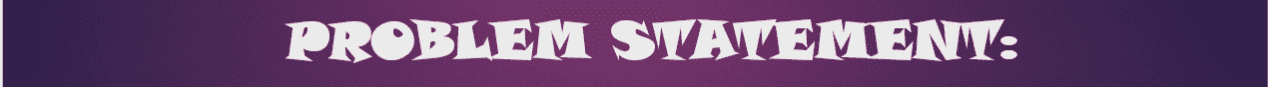

***In simple words- Let's say we have a friend named Elon. And Elon wants to sell his car but the problem is he doesn't know how much he should sell his car for. He wants to sell his car for as much higher as he can and he also wants to set the price reasonably, so someone would want to purchase it. Hence, the price he sets should represent the value of the car.***

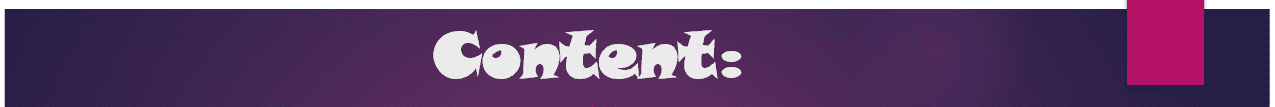

* Reading and exploring data
* Data Wrangling
* Exploratory Data Analysis(EDA)
* Multiple Linear Regression
* Ridge Regression
* Polynomial Regression
* Summary

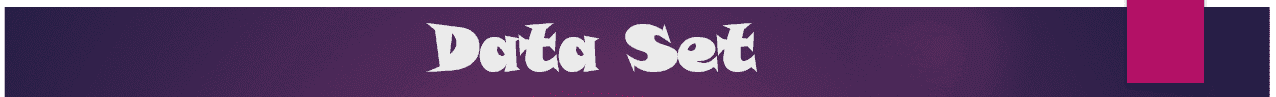
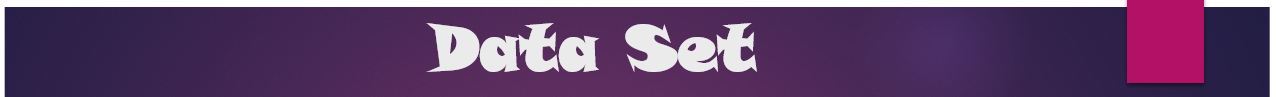

Dataset : The dataset used in this project is an open dataset by Jeffrey C. Schlemmer which includes data on the used car with its features and price.

https://archive.ics.uci.edu/dataset/10/automobile

# Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

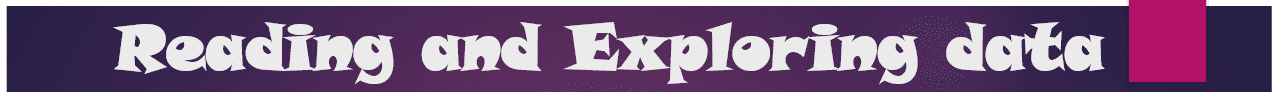
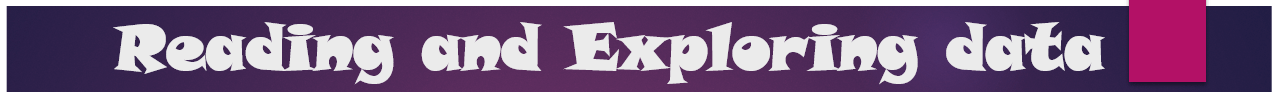

In [2]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv" # Saving the file path
df=pd.read_csv(path, header=None)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Info by:https://archive.ics.uci.edu/dataset/10/automobile

In [5]:
pd.set_option('display.max_columns', None)
df.columns = headers
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [6]:
# We need to replace the "?" symbol with NaN so that we can use dropna() inside numpy to deal with the missing values
df1=df.replace('?',np.NaN)

In [7]:
# We can drop whole row of missing values along the column "price" (target variable) since they contibute nothing to model. 
df=df1.dropna(subset=["price"], axis=0)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


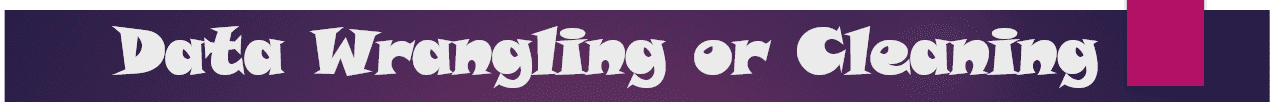
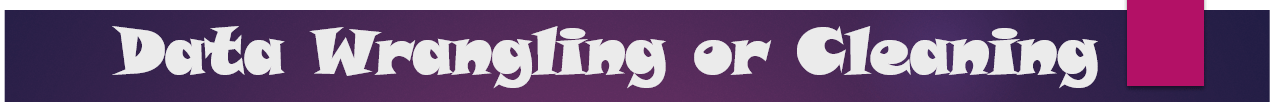

### 1. Dealing with missing values

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 201 rows of data and six of the columns containing missing data:

    1."normalized-losses": 37 missing data
    2."num-of-doors": 2 missing data
    3."bore": 4 missing data
    4."stroke" : 4 missing data
    5."horsepower": 2 missing data
    6."peak-rpm": 2 missing data


In [9]:
#Converting all these attributes into float for performating mathematical function
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis=0)
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
avg_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)

In [10]:
#replacing all NaN's with mean of the column
pd.options.mode.chained_assignment = None
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)

In [11]:
#replacing with mode(frequency)
df['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [12]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [13]:
#Lets check is there any missing value now
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Data looks good

### 2. Dealing with data format

In [14]:
#Converting data types to proper format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
df[["bore", "stroke","price","peak-rpm","horsepower"]] =df[["bore", "stroke","price","peak-rpm","horsepower"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

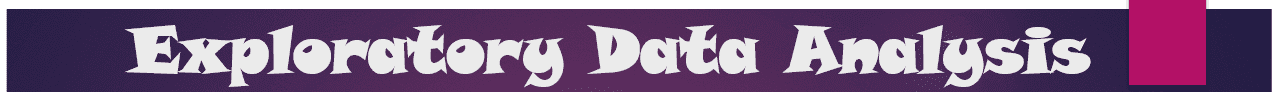
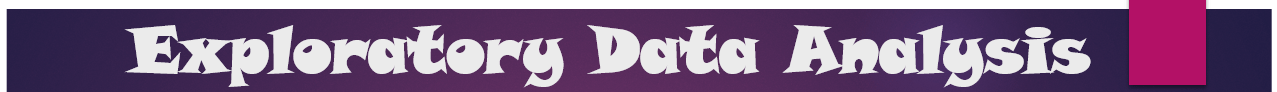

<Axes: >

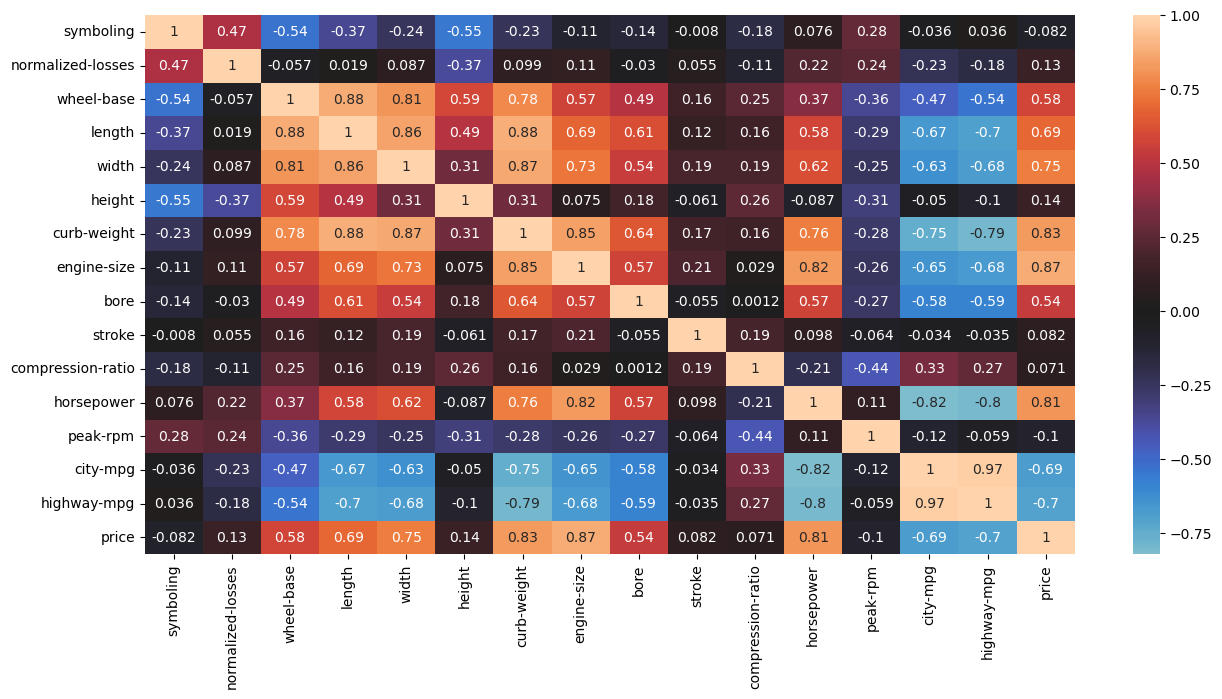

In [16]:
# Finding significant Predictor from numerical attributes
corrmat= df.corr()
corrmat["price"].sort_values()
plt.figure(figsize=(15,7))  
sns.heatmap(corrmat,annot=True,center=0)

#### We can already identify good predictor by looking into to last row in the heat map. Value close to 1 or -1 is highly correlated.

In [17]:
#Applying Pearson Correlation method to measure strength of correlation
def correlation(x):
  pearson_coef, p_value = stats.pearsonr(x, df['price'])
  print('The pearson coefficient:', pearson_coef, ' and p_value is:', p_value,)

In [18]:
print("For Highway-mpg")
correlation(df['highway-mpg'])
print("For city-mpg")
correlation(df['city-mpg'])
print("For peak-rpm")
correlation(df['peak-rpm'])
print("For symboling")
correlation(df['symboling'])
print("For compression-ratio")
correlation(df['compression-ratio'])
print("For stroke")
correlation(df['stroke'])
print("For normalized-losses")
correlation(df['normalized-losses'])
print("For height")
correlation(df['height'])
print("For bore")
correlation(df['bore'])
print("For wheel-base")
correlation(df['wheel-base'])
print("For length")
correlation(df['length'])
print("For width")
correlation(df['width'])
print("For curb-weight")
correlation(df['curb-weight'])
print("For engine-size")
correlation(df['engine-size'])
print("For horsepower")
correlation(df['horsepower'])


For Highway-mpg
The pearson coefficient: -0.704692265058953  and p_value is: 1.749547114447557e-31
For city-mpg
The pearson coefficient: -0.6865710067844678  and p_value is: 2.3211320655675098e-29
For peak-rpm
The pearson coefficient: -0.10154203145050206  and p_value is: 0.15147575707430286
For symboling
The pearson coefficient: -0.08239118716962358  and p_value is: 0.24491487657164734
For compression-ratio
The pearson coefficient: 0.07110732668194143  and p_value is: 0.3158110188729239
For stroke
The pearson coefficient: 0.08226709992212358  and p_value is: 0.24562872821142678
For normalized-losses
The pearson coefficient: 0.13399873429274337  and p_value is: 0.05789749352703108
For height
The pearson coefficient: 0.13548630756805977  and p_value is: 0.0551462732510124
For bore
The pearson coefficient: 0.5431537659807734  and p_value is: 8.051208825441031e-17
For wheel-base
The pearson coefficient: 0.584641822265508  and p_value is: 8.076488270732885e-20
For length
The pearson coeffi

In [19]:
#Visualing top numerical perdictors correlation
def pairs(x, fig):
  plt.subplot(4, 2, fig)
  plt.scatter(df[x], df['price'],c='#d62728',alpha=1,marker='^')
  plt.xlabel(x)
  plt.ylabel('Price')

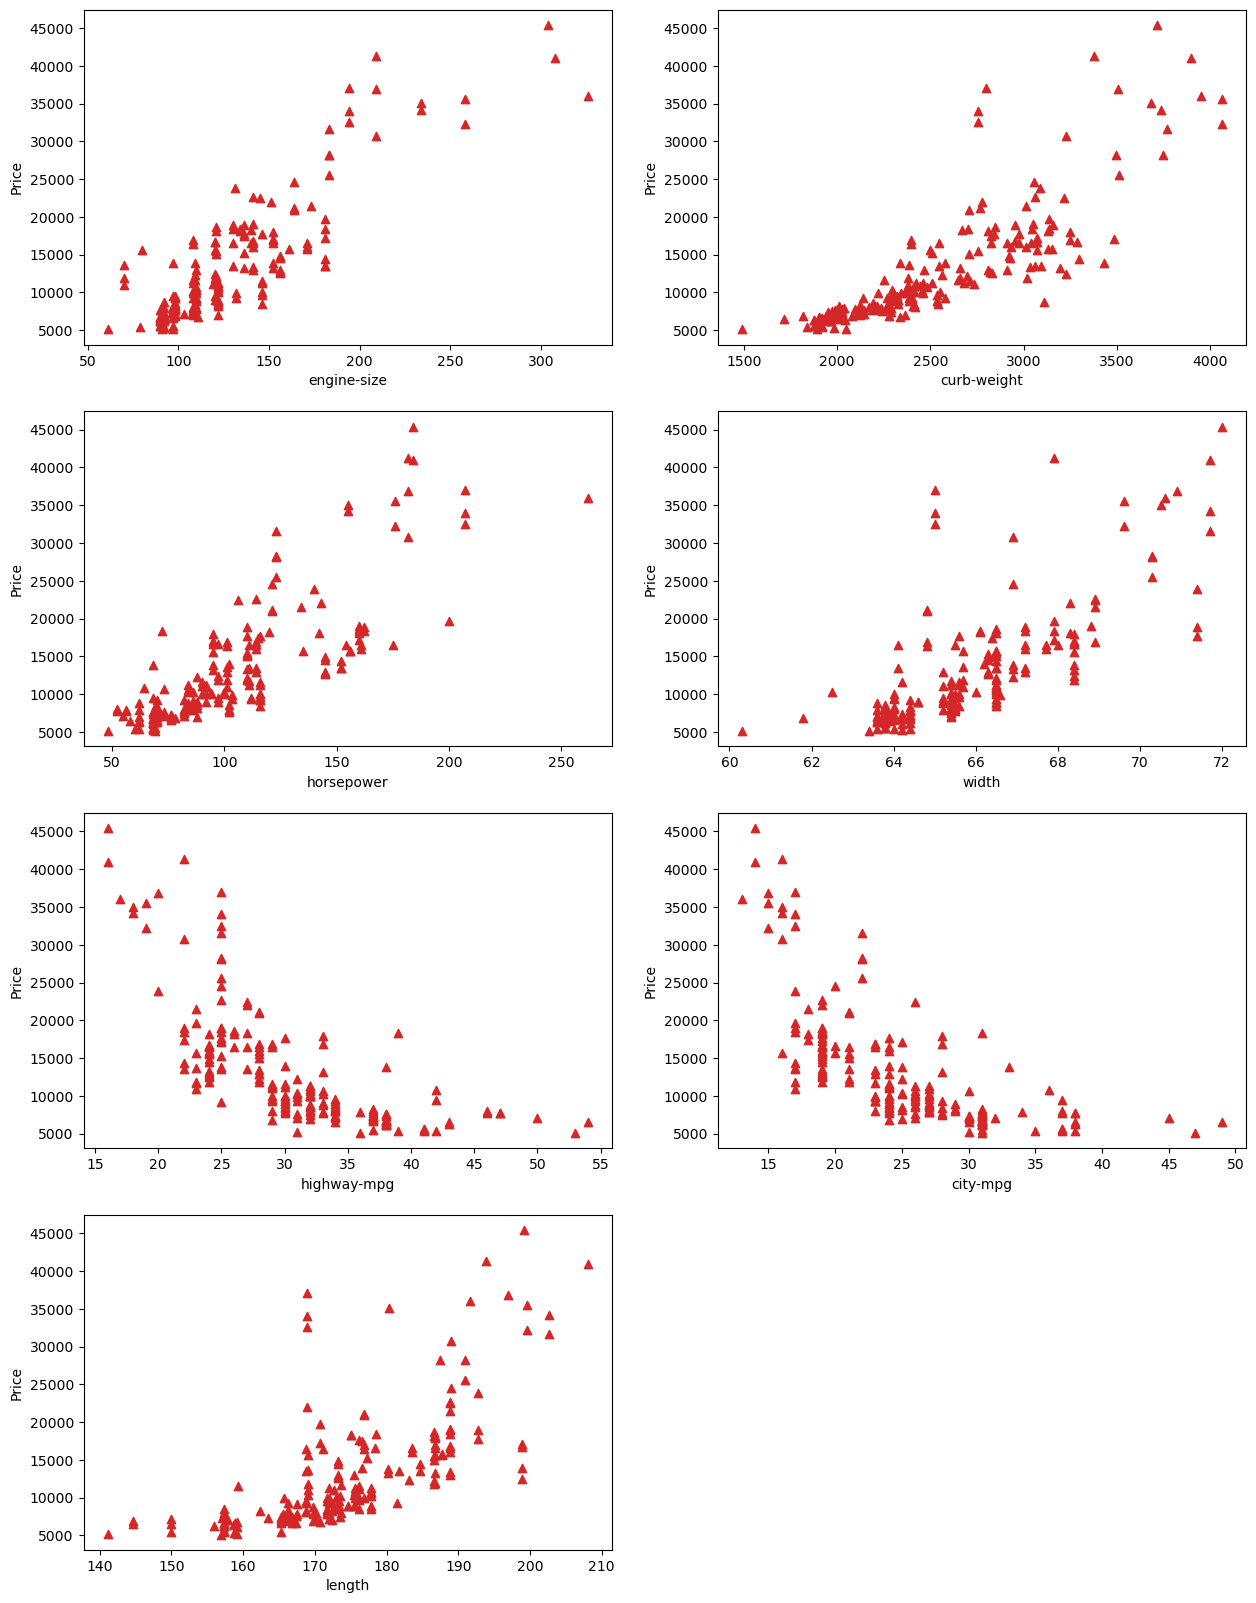

In [20]:
plt.figure(figsize=(15,20))
pairs('engine-size', 1)
pairs('curb-weight', 2)
pairs('horsepower', 3)
pairs('width', 4)
pairs('highway-mpg', 5)
pairs('city-mpg', 6)
pairs('length', 7)

<p>From the above results, The top predictors/independent variables from numerical data are:</p>
      <li>1. engine-size: Positive Correlation
      <li>2. curb-weight: Positive Correlation
      <li>3. horspower  : Positive Correlation
      <li>4. width      : Positive Correlation
      <li>5. highway-mpg: Negative Correlation
      <li>6. cit-mpg    : Negative Correlation
      <li>7. length     : Positive Correlation

In [21]:
# Finding significant Predictor from categorical attributes
df.select_dtypes(include='object').columns.tolist()  #Retriving column names of object type

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

<Axes: xlabel='make', ylabel='price'>

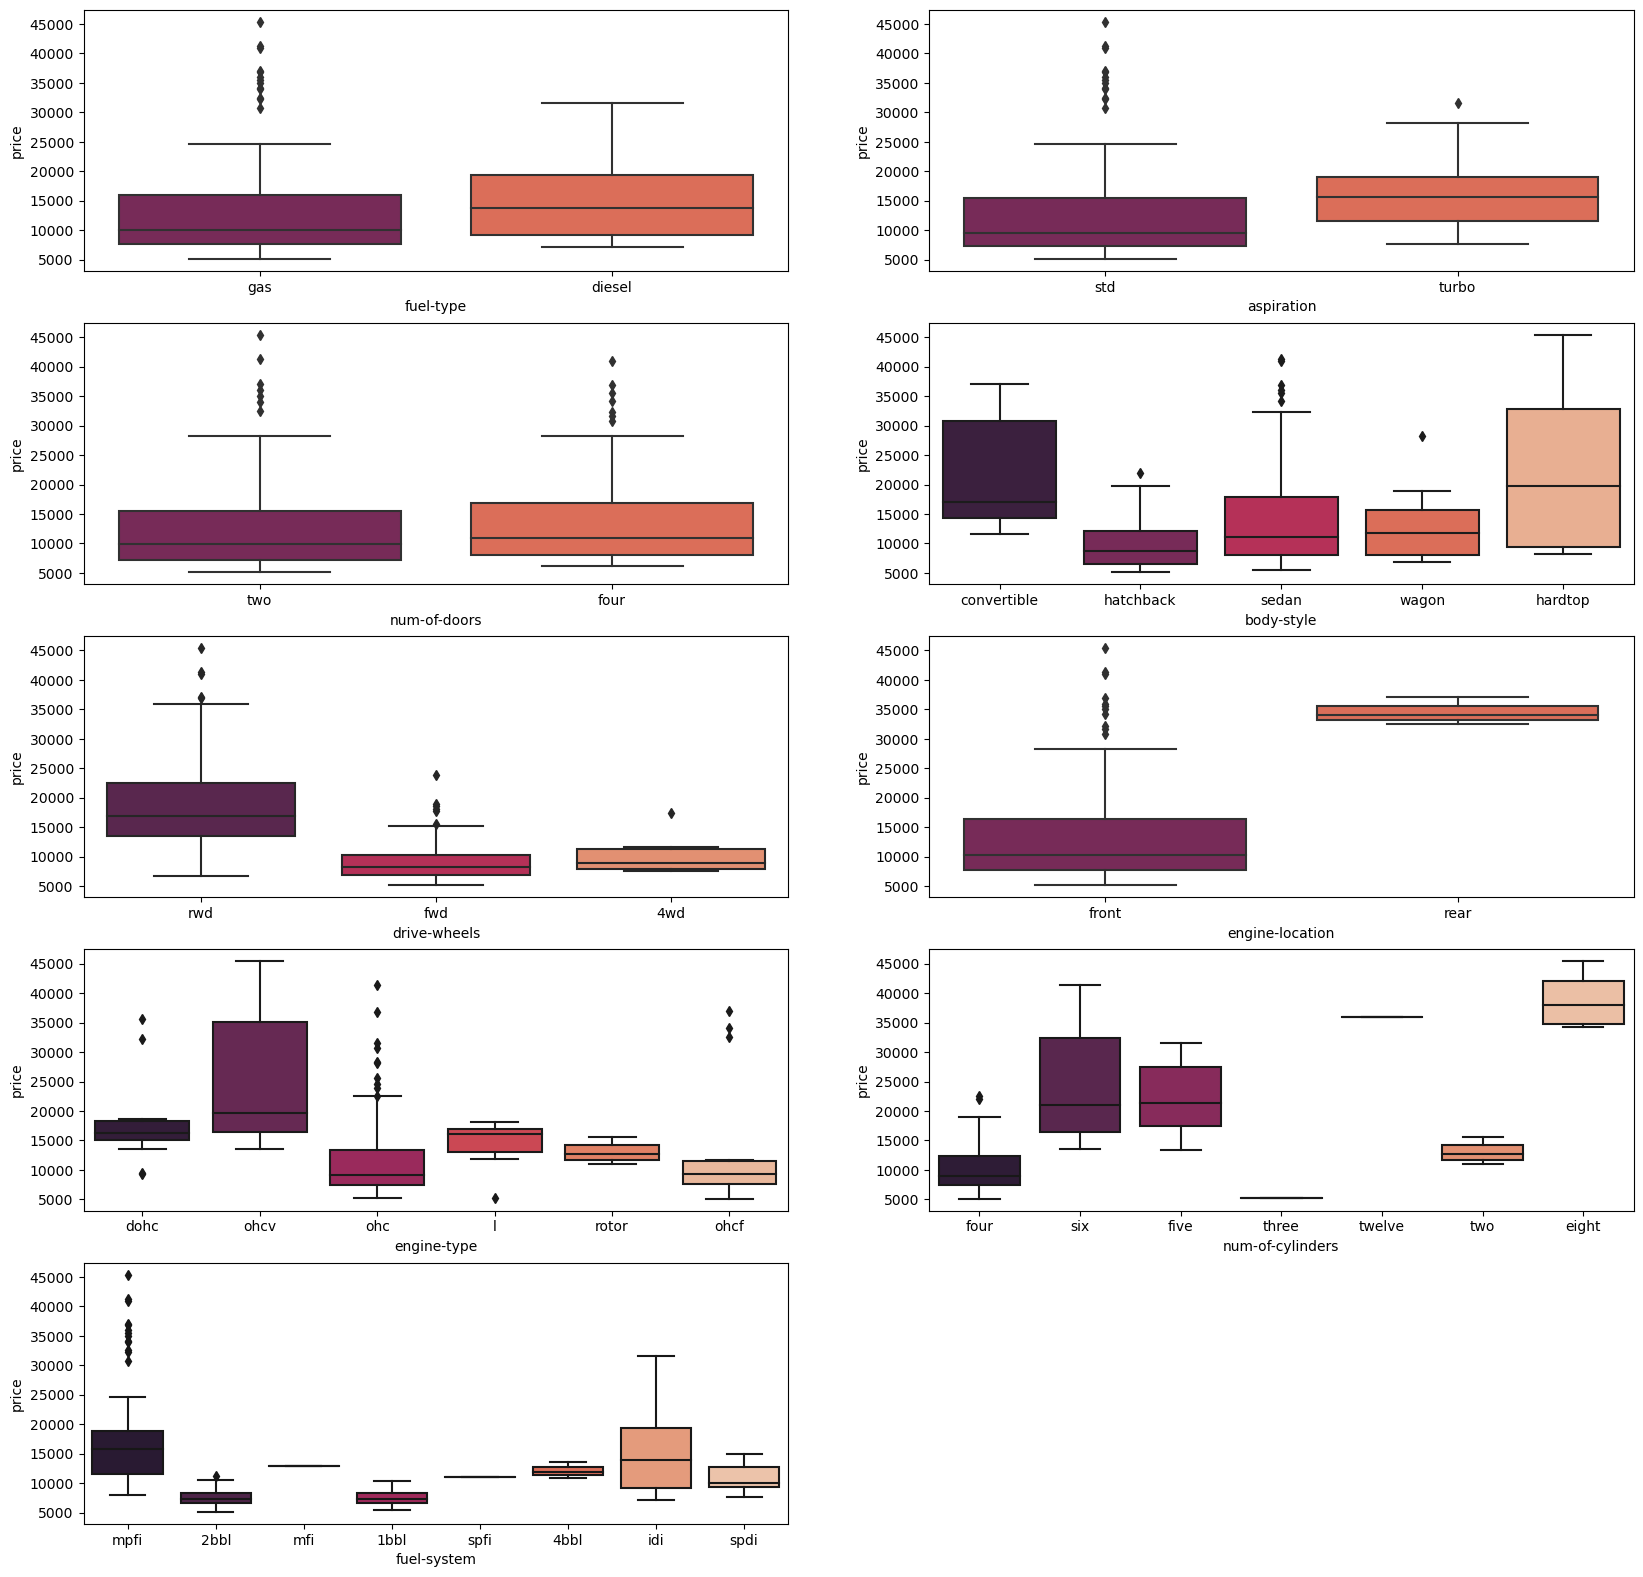

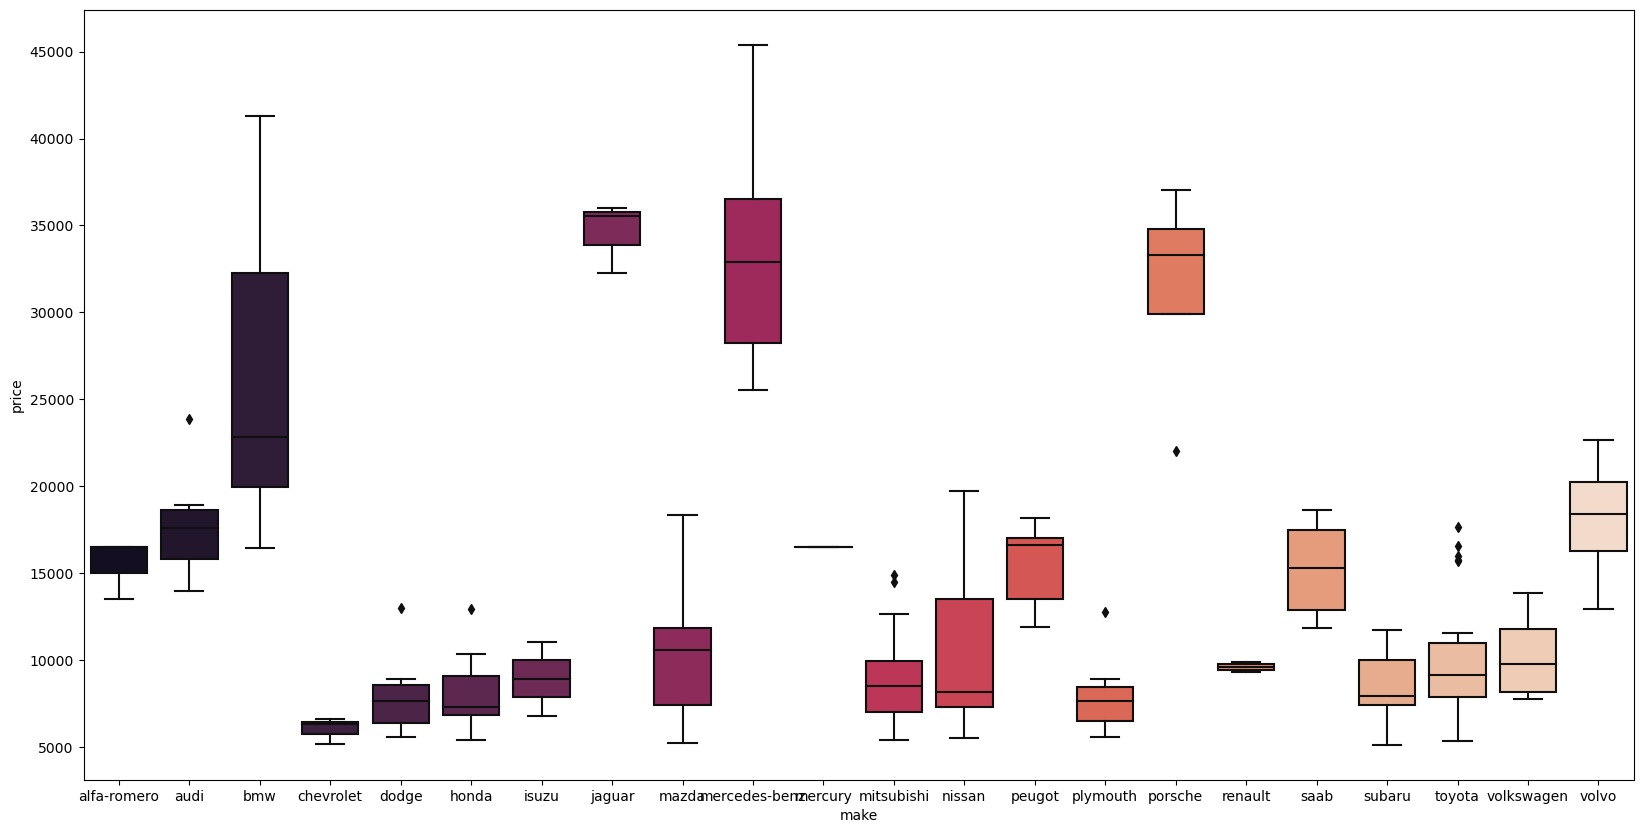

In [22]:
def plots(data, fig):
  plt.subplot(10,2,fig)
  sns.boxplot(x = data,y="price", data = df,palette=("rocket"))

plt.figure(figsize=(20,40))
plt.tight_layout()
plots('fuel-type', 1)
plots('aspiration', 2)
plots('num-of-doors', 3)
plots('body-style', 4)
plots('drive-wheels', 5)
plots('engine-location', 6)
plots('engine-type', 7)
plots('num-of-cylinders', 8)
plots('fuel-system', 9)
plt.figure(figsize=(20,10))
sns.boxplot(x ='make',y="price", data = df, palette=("rocket"))


We see that the distributions of "price" between different variables."engine-location" categories, front and rear, 
are distinct enough to take engine-location as a potential good predictor of price. However, All other variables have   
have a significant overlap, so they would not be a good predictor of price

<p>Summary :The variables are narrowed down to the following:</p>

Continuous numerical variables:
    <li>engine-size</li>
    <li>curb-weight</li>
    <li>horsepower</li>
    <li>width</li>
    <li>highway-mpg</li>
    <li>city-mpg</li><li>length</li>    
    
Categorical variables:
    <li>engine-location</li>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.<p>



In [23]:
#Applying One-Hot Coding for engine-location (Turning Categorical variable to quantitative for modelling)
dummy = pd.get_dummies(df["engine-location"])
dummy.head()

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [24]:
dummy.rename(columns={'front':'engine-location-front', 'rear':'engine-location-rear'}, inplace=True)
dummy.head()

,engine-location-front,engine-location-rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy], axis=1)

# drop original column "fuel-type" from "df"
df.drop("engine-location", axis = 1, inplace=True)

In [26]:
#Considering Significant predictor variables
model_data = df[["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]]

In [27]:
model_data.head(3)

,engine-size,curb-weight,horsepower,width,highway-mpg,city-mpg,length,engine-location-front,engine-location-rear
0,130,2548,111.0,64.1,27,21,168.8,1,0
1,130,2548,111.0,64.1,27,21,168.8,1,0
2,152,2823,154.0,65.5,26,19,171.2,1,0


In [28]:
#Normalization: required to bring range of value into similar range 
scaler = StandardScaler()
x_data = scaler.fit_transform(model_data)
x_data = pd.DataFrame(x_data)

In [29]:
x_data.columns = ["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]
x_data.head()

,engine-size,curb-weight,horsepower,width,highway-mpg,city-mpg,length,engine-location-front,engine-location-rear
0,0.075389,-0.014858,0.203984,-0.853460,-0.542288,-0.652249,-0.439409,0.123091,-0.123091
1,0.075389,-0.014858,0.203984,-0.853460,-0.542288,-0.652249,-0.439409,0.123091,-0.123091
2,0.606234,0.518080,1.357649,-0.185597,-0.689386,-0.964397,-0.244152,0.123091,-0.123091
3,-0.431327,-0.423766,-0.037480,0.148335,-0.100993,-0.184027,0.195176,0.123091,-0.123091
4,0.220165,0.520017,0.311302,0.243744,-1.277779,-1.120471,0.195176,0.123091,-0.123091


In [30]:
y_data = df["price"]
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 201, dtype: float64

# Model Development

In [31]:
#Spliting test and train data with standard ratio
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.4,random_state=1)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (120, 9)
shape of y_train (120,)
shape of x_test (81, 9)
shape of y_test (81,)


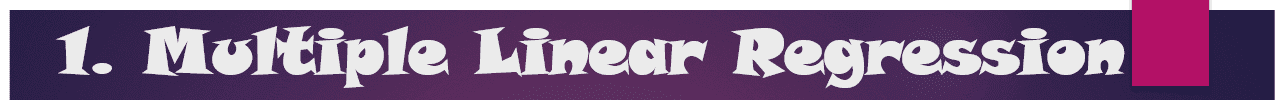
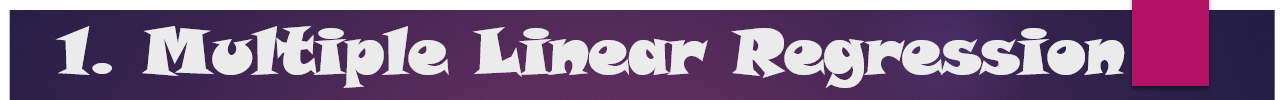

In [32]:
#creating object, using which we could generate instances.
lm = LinearRegression() 

In [33]:
#Fitting model by supplying train data
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
yhat_MLR = lm.predict(x_test)
print("Predicted price for test data are:", yhat_MLR[0:5].tolist())

Predicted price for test data are: [11168.232839578788, 5282.996582655764, 12469.241181415182, 5768.953182291489, 14942.59602044622]


## Model Evaluation

### 1. Visualization Method

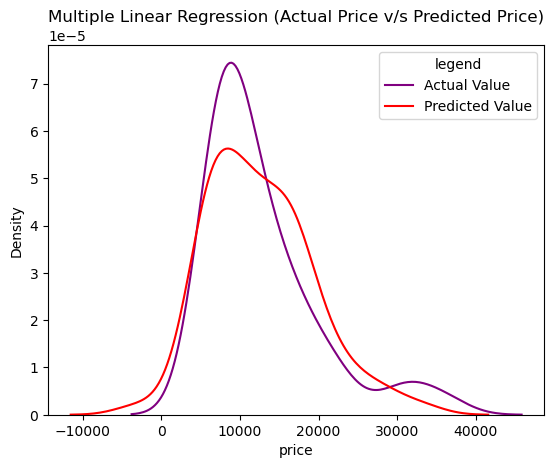

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Multiple Linear Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_MLR,hist=False,color='red',label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

###  2. In-Sample Method

In [36]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_MLR)
print('The mean square error of price and predicted value is: ', mse)
    

The mean square error of price and predicted value is:  11810127.289506366


In [37]:
#R-Squared
print('the R-Squared value of fitted model is:',lm.score(x_train,y_train))

the R-Squared value of fitted model is: 0.87821798354801


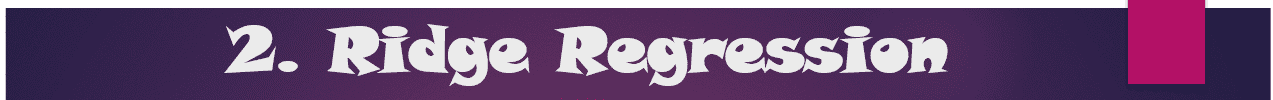
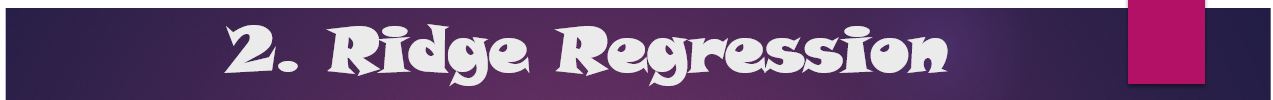

In [38]:
#Identifing value of Alpha using auto iterative method called GridSearchCV().
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #initializing alpha value to obtain best one.
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data, y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

In [39]:
#Creating object though which instances can be created in further steps.
RidgeModel = Ridge(alpha=10)

In [40]:
#Fitting Ridge model
RidgeModel.fit(x_train,y_train)

Ridge(alpha=10)

In [41]:
yhat_Ridge = RidgeModel.predict(x_test)

In [42]:
print("Predicted price for test data are:", yhat_Ridge[0:5].tolist())

Predicted price for test data are: [11046.40720082743, 5228.976328915872, 12261.225734819296, 5958.8560913491965, 14685.51237078751]


## Model Evaluation

### 1. Visualization Method 

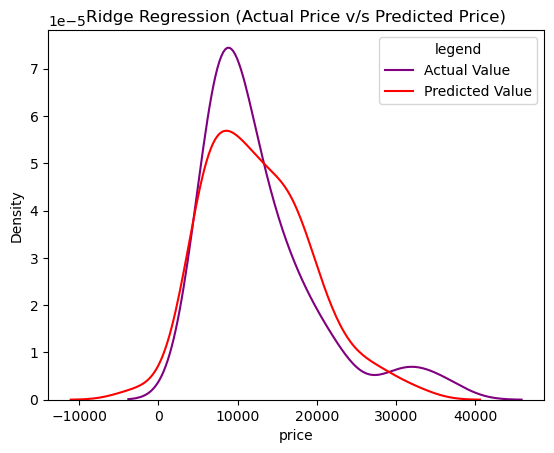

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Ridge Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_Ridge,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

### 2. In-Sample Method

In [44]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_Ridge)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11497260.176787565


In [45]:
#R-Squared
print('the R-Squared value of fitted model is:',RidgeModel.score(x_train,y_train))

the R-Squared value of fitted model is: 0.8761679017052117


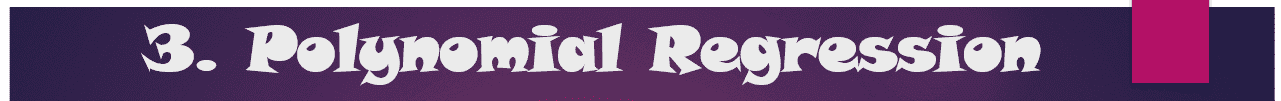
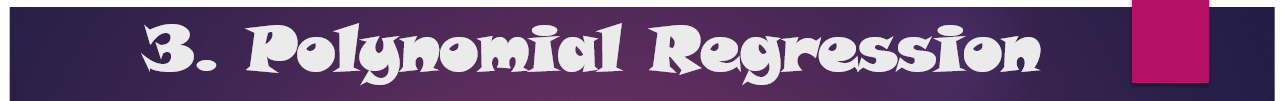

In [46]:
#Creating object though which instances can be created in further steps.
PolyModel=PolynomialFeatures(degree=2)  # Degree 2 is fixed after trail and error as its o/p was top.

In [47]:
#Transforming data to feed polynomial model
x_train_pr=PolyModel.fit_transform(x_train)
x_test_pr=PolyModel.fit_transform(x_test)

In [48]:
poly1=LinearRegression().fit(x_train_pr,y_train)

In [49]:
yhat_poly=poly1.predict(x_test_pr)

## Model Evaluation

### 1. Visualization Method 

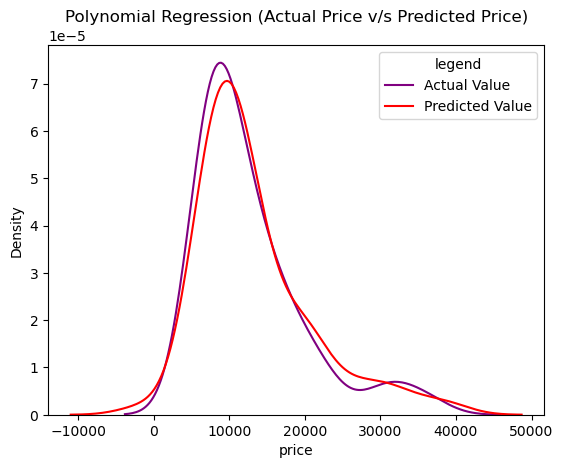

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Polynomial Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_poly,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

### 2. In-Sample Method

In [51]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_poly)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  13844963.372986594


In [52]:
#R-Squared
print('the R-Squared value of fitted model is:',poly1.score(x_train_pr,y_train))

the R-Squared value of fitted model is: 0.9495519340079633


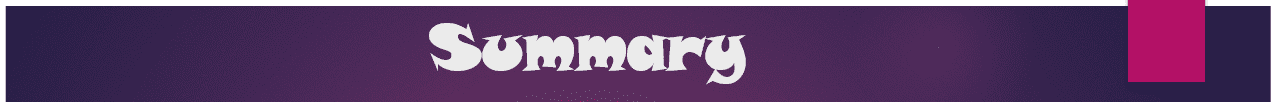
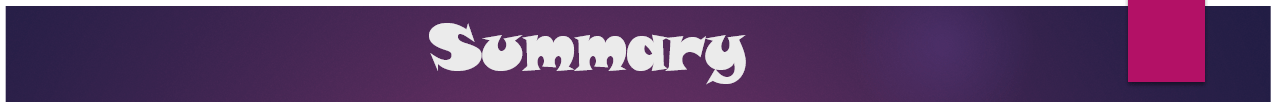

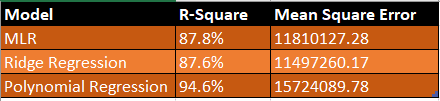

<li>Clearly, Polynomial Regression out performs other two model with sizzling 95% of accurancy.We can say that ~95 % of the variation of price is explained by this polynomail regression.

<li>However, as polynomial regression can be used to solve multi-collinearity, they are proned to suffer overfitting. Hence, proper evaluation need to be done while using Polynomial regression for the prediction.

<li>Now, Elon can gather values of all the significant variable mentioned above, to know the estimated value of his car. If you like the work then please consider upvote and happy to answer any question in comment section. 😃👍🚗🚗 